In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("/content/ReadyForModel_medicine_quality_dataset.csv")

# Split into features (X) and target (y)
X = df.drop(columns=["Safe/Not Safe"])  # Features
y = df["Safe/Not Safe"]  # Target

# Train a Decision Tree model
tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth for better interpretability
tree.fit(X, y)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [15]:
# Extract feature importance & threshold values
thresholds = tree.tree_.threshold
features = X.columns
feature_thresholds = {}

# Get feature thresholds
for feature, threshold in zip(features, thresholds):
    if threshold != -2:  # Ignore non-splitting nodes
        feature_thresholds[feature] = threshold

# Print the threshold for each feature
for feature, threshold in feature_thresholds.items():
    print(f"Feature: {feature}, Threshold: {threshold}")


Feature: Active Ingredient, Threshold: 0.6590590476989746
Feature: Days Until Expiry, Threshold: -0.9490029513835907
Feature: Warning Labels Present, Threshold: 1.1112220287322998
Feature: Dissolution Rate (%), Threshold: -1.1241607069969177
Feature: Impurity Level (%), Threshold: -1.7569880485534668


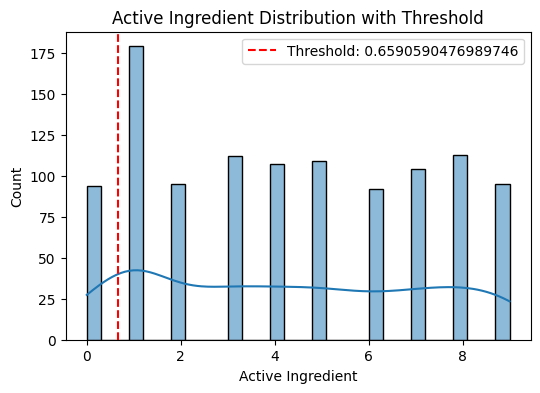

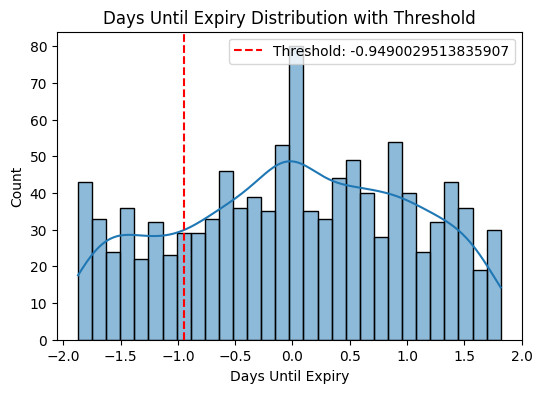

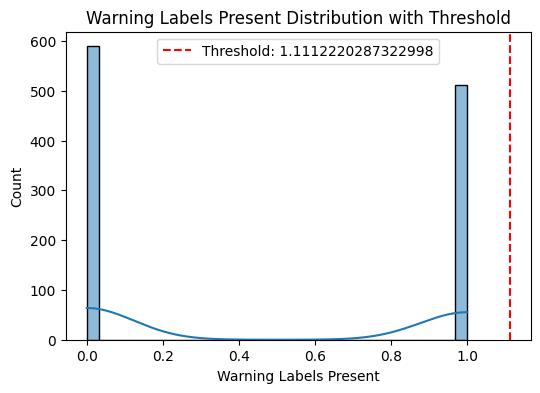

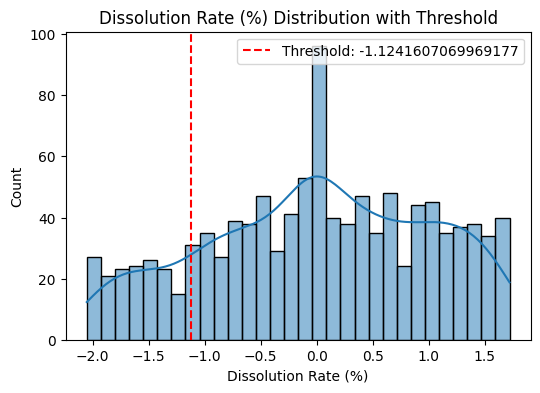

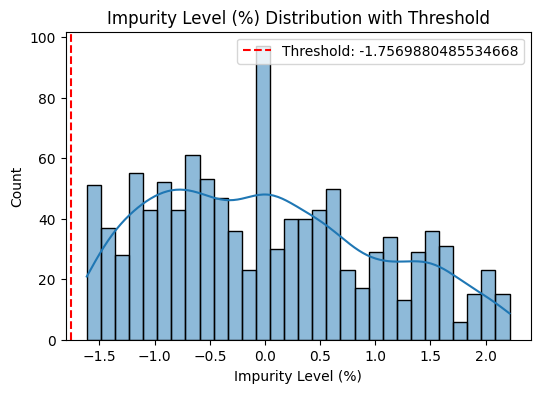

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution for each feature with a threshold line
for feature, threshold in feature_thresholds.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.axvline(x=threshold, color="red", linestyle="--", label=f"Threshold: {threshold}")
    plt.title(f"{feature} Distribution with Threshold")
    plt.legend()
    plt.show()


In [18]:
df.head()

,Active Ingredient,Days Until Expiry,Storage Temperature (°C),Warning Labels Present,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%),Safe/Not Safe
0,1,1.083420,-0.039583,1.0,0.247526,-0.244656,-0.224418,0.988364,1
1,1,-0.002074,-1.743806,0.0,1.518975,0.660697,1.314037,-1.668766,0
2,9,-1.178978,1.768609,1.0,-0.311140,0.350433,-0.539454,0.066808,1
3,1,-1.236109,-0.111311,1.0,0.991379,0.277237,1.544341,-1.313189,0
4,1,-0.158233,0.198275,0.0,-0.063508,0.217775,0.536622,0.175328,1
